In [2]:
from torchvision.io import read_image
from torchvision.transforms.functional import crop
from torchvision.transforms.functional import invert
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import torch
from PIL import Image
import os
import albumentations as A
from albumentations.pytorch import ToTensorV2
import pydicom
from pydicom.data import get_testdata_file
pydicom.config.convert_wrong_length_to_UN = True
from skimage import exposure
from scipy import stats
from IPython.display import clear_output
from skimage.exposure import match_histograms
from skimage import exposure

/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.2.2) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.18 (you have 1.4.12). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.


In [3]:

image_information = pd.DataFrame()
img_dir = r'/home/alex/Documents/new try/Data/losw-dose-simulation/Phantom'
files = os.listdir(img_dir)
for idx in range(len(files)):
    file_path = os.path.join(img_dir, files[idx])
    ds = pydicom.dcmread(file_path, force = True)
    try:
        muAs = ds.ExposureInuAs
        filter_type = ds.FilterType
        addition = pd.DataFrame.from_dict({
            "file_path" : files[idx],
            "muAs" : [muAs],
            "filter_type" : filter_type
        })
        image_information = pd.concat([image_information, addition], ignore_index= True, axis= 0)
    except:
        pass

In [4]:
image_information = image_information.sort_values(by = 'muAs').reset_index(drop=True)
image_information


,file_path,muAs,filter_type
0,650.dcm,650,CU_0.3_MM
1,710.dcm,710,CU_0.3_MM
2,760.dcm,760,CU_0.3_MM
3,840.dcm,840,CU_0.3_MM
4,950.dcm,950,CU_0.3_MM
5,1050.dcm,1050,CU_0.3_MM
6,1150.dcm,1150,CU_0.3_MM
7,1250.dcm,1250,CU_0.3_MM
8,1390.dcm,1390,CU_0.3_MM
9,1550.dcm,1550,CU_0.3_MM


In [6]:
img_dir = r'/home/alex/Documents/new try/Data/losw-dose-simulation/Phantom'
files = os.listdir(img_dir)

In [7]:
len(files)

18

In [8]:
def get_image(idx):
    img_dir = r'/home/alex/Documents/new try/Data/losw-dose-simulation/Phantom'
    file_path = os.path.join(img_dir, image_information['file_path'][idx])
    ds = pydicom.dcmread(file_path, force = True)
    ds_center = ds.WindowCenter
    ds_width = ds.WindowWidth
    dcm_img = ds.pixel_array
    image = (dcm_img - (ds_center - ds_width/2))/ ds_width
    image = np.clip(image, a_min = 0, a_max= 1)
    return (255*image).astype(int), dcm_img, ds_center, ds_width

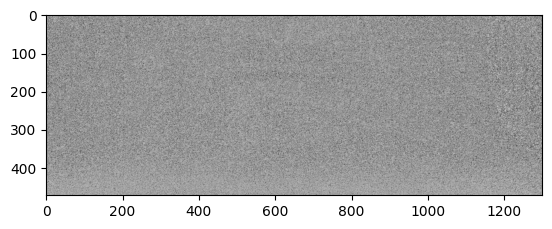

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00, 1.0000e+00,
        1.0000e+00, 4.0000e+00, 3.0000e+00, 1.1000e+01, 4.0000e+00,
        1.3000e+01, 9.0000e+00, 1.4000e+01, 3.5000e+01, 1.3000e+01,
        3.0000e+01, 3.4000e+01, 6.7000e+01, 5.6000e+01, 5.5000e+01,
        1.6500e+02, 1.0200e+02, 1.5000e+02, 2.0400e+02, 5.2800e+02,
        3.6000e+02, 4.5600e+02, 1.1980e+03, 7.3000e+02, 9.0100e+02,
        9.6700e+02, 2.4250e+03, 1.4850e+03, 1.8330e+03, 4.8290e+03,
        3.2580e+03, 3.5220e+03, 7.5750e+03, 3.7580e+03, 3.6730e+03,
        3.4260e+03, 6.3140e+03, 3.6580e+03, 4.3780e+03, 1.1401e+04,
        7.2860e+03, 8.1270e+03, 9.0110e+03, 2.0180e+04, 1.0973e+04,
        1.1138e+04, 2.3981e+04, 1.2133e+04, 1.2399e+04, 1.3443e+04,
        3.0911e+04, 1.7942e+04, 1.9573e+04, 4.1067e+04, 2.0946e+04,
        1.9061e+04, 1.9039e+04, 2.9928e+04, 1.5064e+04, 1.5561e+04,
        3.7916e+04, 2.1931e+04, 2.2995e+04, 4.6734e+04, 1.9603e+04,
        1.4738e+04, 9.7790e+03, 8.4130e+03, 1.49

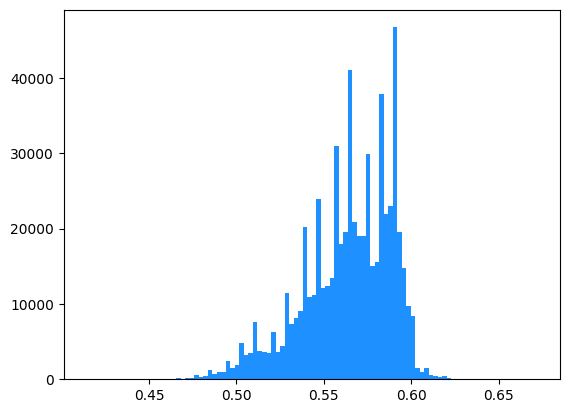

In [26]:
img_dir = r'/home/alex/Documents/new try/Data/losw-dose-simulation/Phantom'
file_path = os.path.join(img_dir, image_information['file_path'][0])
ds = pydicom.dcmread(file_path, force = True)
ds_center = ds.WindowCenter
ds_width = ds.WindowWidth
dcm_img = ds.pixel_array
image = (dcm_img - (ds_center - ds_width/2))/ ds_width
image = np.clip(image, a_min = 0, a_max= 1)

plt.imshow(image[2000:, 500:1800], cmap ='gray')
plt.show()
plt.hist(image[2000:, 500:1800].flatten(), bins = 100, color='dodgerblue')

In [10]:
def Plot_image_and_hist(source, reference, matched):
    fig, axs = plt.subplots(2,3, figsize=(18, 12))
    img_cdf, bins = exposure.cumulative_distribution(source)
    axs[0,0].plot(bins, img_cdf)
    axs[0,0].set_title('Source')

    img_cdf, bins = exposure.cumulative_distribution(reference)
    axs[0,1].plot(bins, img_cdf)
    axs[0,1].set_title('Reference')

    img_cdf, bins = exposure.cumulative_distribution(matched)
    axs[0,2].plot(bins, img_cdf)
    axs[0,2].set_title('Matched')
    
    axs[1,0].imshow(source, cmap = 'gray', vmin = 0, vmax = 255)
    axs[1,0].set_title(f'mean: {source.mean():.2f}, std: {source.std():.2f}')
    axs[1,1].imshow(reference, cmap = 'gray', vmin = 0, vmax = 255)
    axs[1,1].set_title(f'mean: {reference.mean():.2f}, std: {reference.std():.2f}')
    axs[1,2].imshow(matched, cmap = 'gray', vmin = 0, vmax = 255)
    axs[1,2].set_title(f'mean: {matched.mean():.2f}, std: {matched.std():.2f}')

    plt.tight_layout()
    plt.show()

# Get images

In [11]:
images_dir = r'/home/alex/Documents/new try/Data/Lung Unet/data/train/images'
images_inner_dir = os.listdir(images_dir)
img_path = os.path.join(images_dir, images_inner_dir[0])
real_image = np.array(Image.open(img_path).convert('L'))
real_image = real_image.astype(int)
reference, dcm_img, ds_center, ds_width = get_image(17)


# Transforms

In [12]:
resize_transform = A.Compose(
        [
            A.Resize(height=256, width=256),
            ToTensorV2()
        ]
    )

In [13]:
center_crop = A.CenterCrop(2600, 2400)

In [14]:
# source = center_crop(image = real_image)['image']
source = real_image
matched = match_histograms(source, reference)

# Comare images and histograms

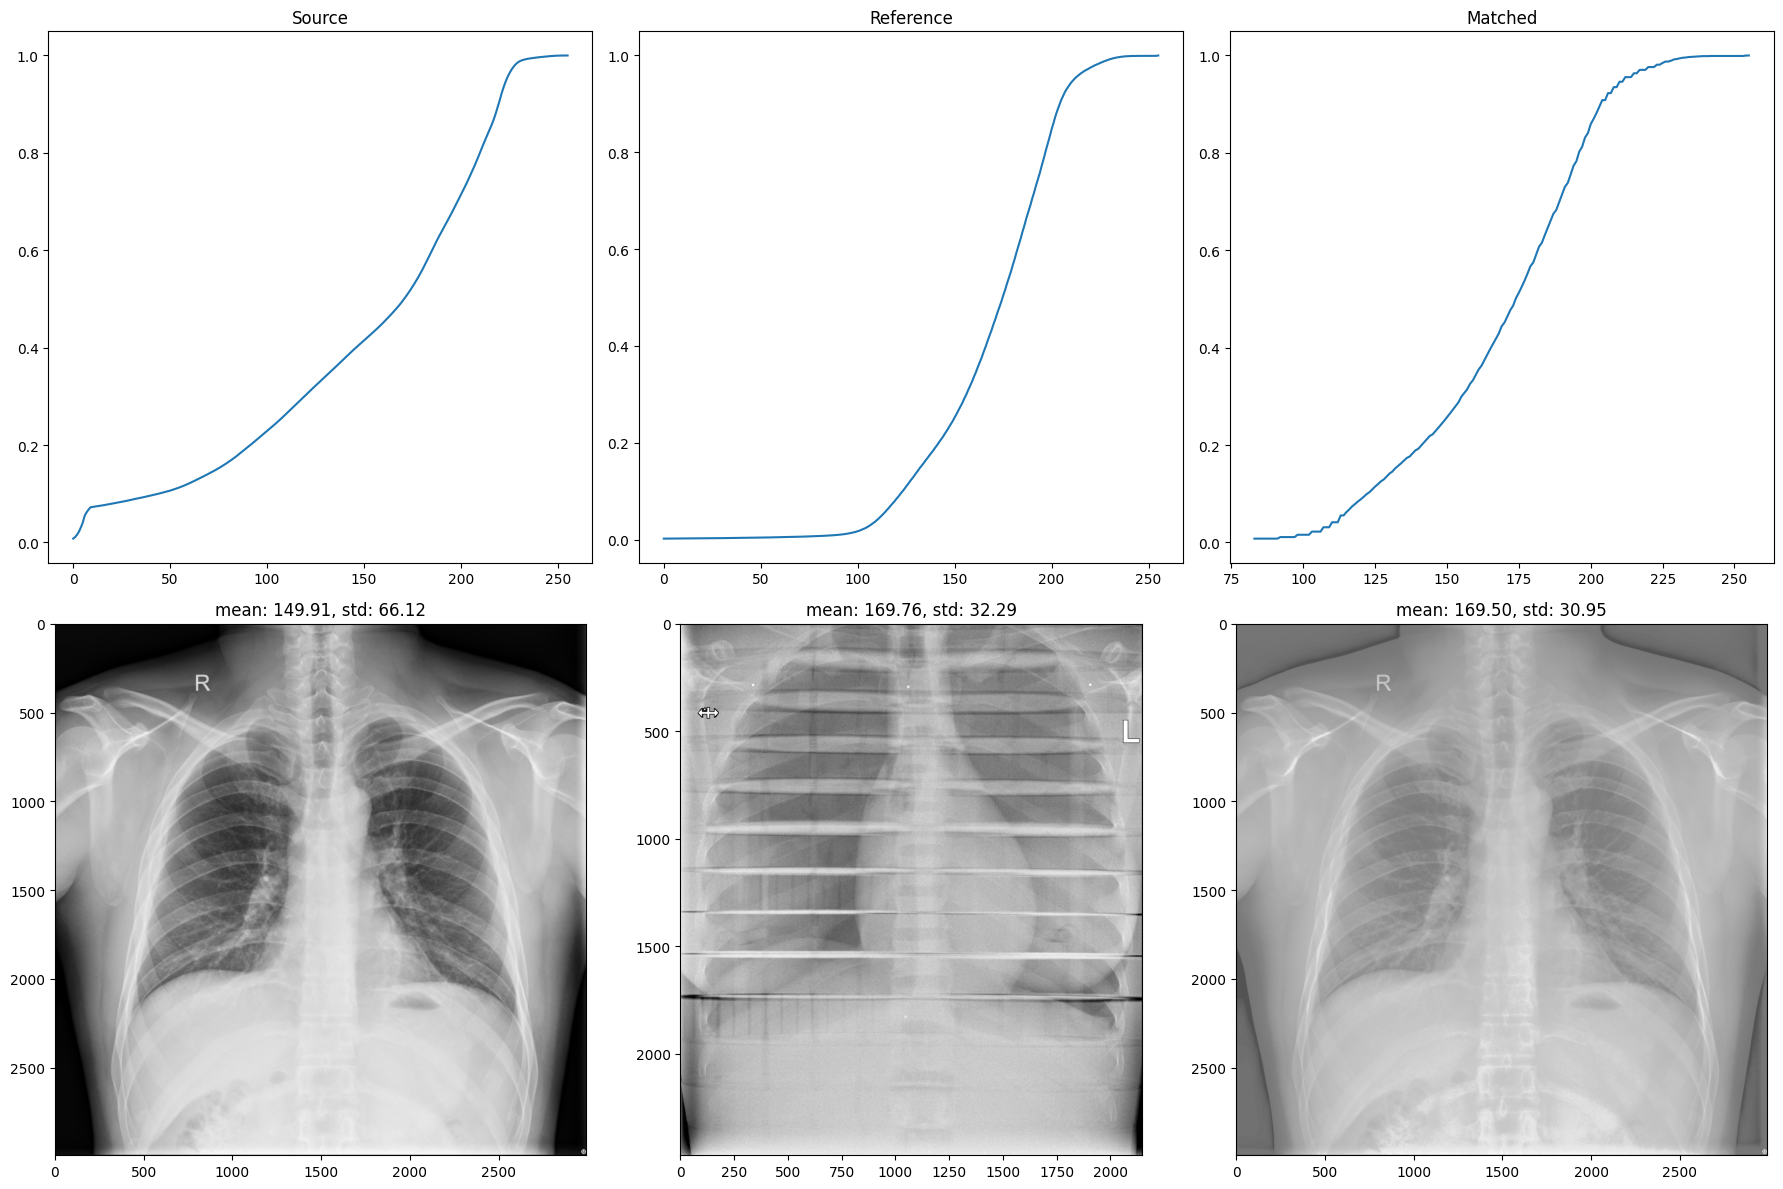

In [15]:
Plot_image_and_hist(source, reference, matched.astype(int))

# second matching

In [16]:
source.shape

(2995, 2993)

In [17]:
def match_histograms_and_noise(source, reference):
    matched = match_histograms(source, reference).astype(int)
    matched_noisy = np.random.poisson(matched)
    #gausian_noise = np.random.normal(0, 24, matched_noisy.shape)
    return matched_noisy #+ gausian_noise

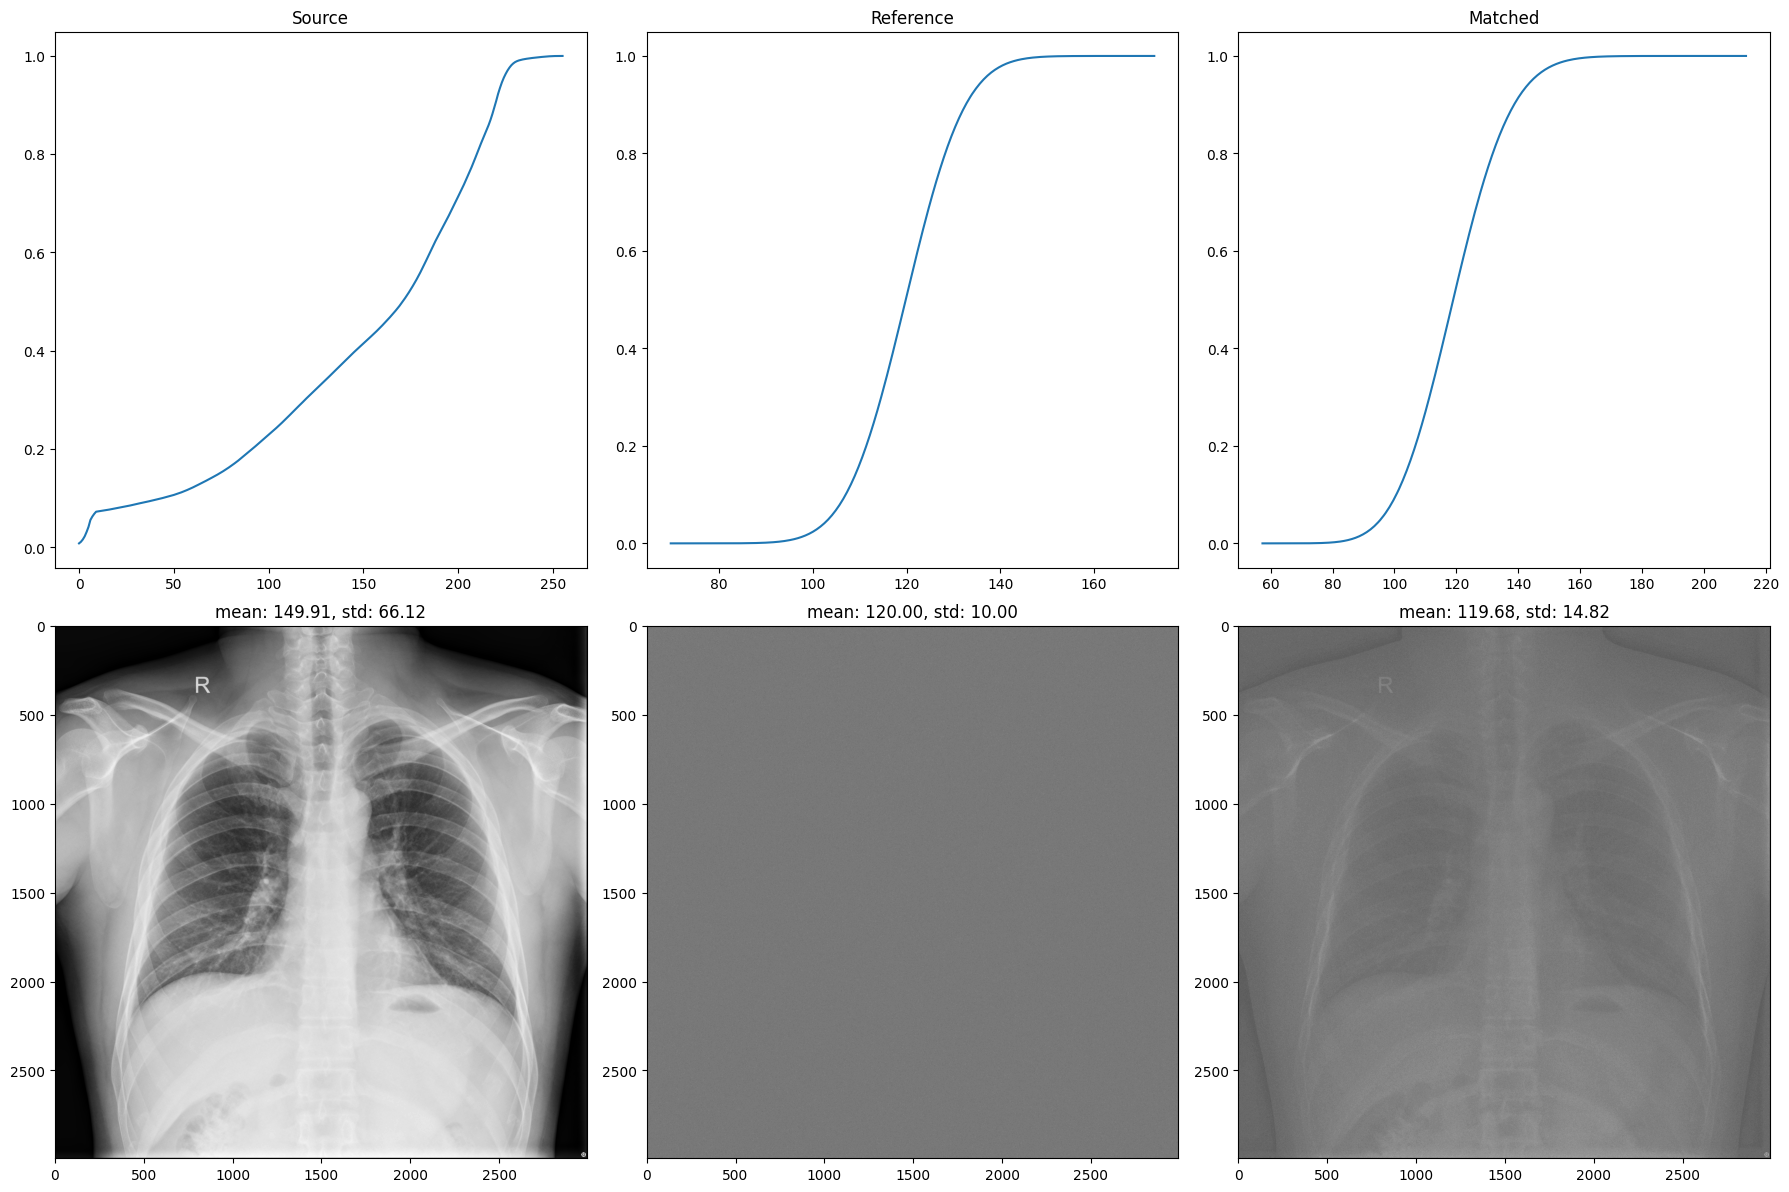

In [24]:
std = 10
ratio = 0.05
s = np.random.normal(120, std, (2995, 2993))

#matched_noisy = match_histograms_and_noise(source, reference)
matched = match_histograms_and_noise(source, s)
gaussian_noise = np.random.normal(0, ratio*std, (2995, 2993))
matched = matched + gaussian_noise
Plot_image_and_hist(source, s, matched)